In [13]:
from __future__ import print_function
import os, sys, gzip, glob, json, time, argparse

import pandas as pd
from pandas.io.json import json_normalize
import numpy as np

from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler, MinMaxScaler, MaxAbsScaler
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

from keras.utils import to_categorical
from keras import backend as K
from keras.layers import Input, Dense, Dropout, Activation, Conv1D, MaxPooling1D, Flatten
from keras import optimizers
from keras.optimizers import SGD, Adam, RMSprop
from keras.models import Sequential, Model, model_from_json, model_from_yaml
from keras.utils import np_utils
from keras.callbacks import ModelCheckpoint, CSVLogger, ReduceLROnPlateau

In [14]:
K.clear_session()
mvalues = [0.125, 0.25, 0.50, 1.0, 2.0, 3.0, 5.0]
lvalues = [0.39, 0.40, 0.43, 0.48, 0.58, 0.68, 0.88]
Mass = np.array(mvalues, dtype=float)
Length = np.array(lvalues, dtype=float)

In [15]:
for i,m in enumerate(mvalues):
    print("For {} Mass in Kg, the Length in m1 {}".format(m, lvalues[i]) )

For 0.125 Mass in Kg, the Length in m1 0.39
For 0.25 Mass in Kg, the Length in m1 0.4
For 0.5 Mass in Kg, the Length in m1 0.43
For 1.0 Mass in Kg, the Length in m1 0.48
For 2.0 Mass in Kg, the Length in m1 0.58
For 3.0 Mass in Kg, the Length in m1 0.68
For 5.0 Mass in Kg, the Length in m1 0.88


In [16]:
# Import necessary modules
import keras
from keras.layers import Dense
from keras.models import Sequential


#callbacks_list = [checkpoint]

# Set up the model: model
model = Sequential()

# Add the first layer
model.add(Dense(1, activation='relu', input_shape=(1,)) )


# checkpoint
filepath="weights-improvement-{epoch:02d}-{val_accuracy:.2f}.hdf5"
checkpoint = ModelCheckpoint(filepath, 
                             monitor='val_accuracy', 
                             verbose=1, 
                             save_best_only=True, mode='max')


# Compile the model
model.compile(optimizer='adam',
              loss = "mean_squared_error",
              metrics=['accuracy'])

# Verify that model contains information from compiling
print("Loss function: " + model.loss)

Loss function: mean_squared_error


In [27]:
# Fit the model
history = model.fit(mvalues, lvalues, epochs=1100, verbose = False)

In [28]:
print(history)
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 1)                 2         
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


In [29]:
history.history.keys()

dict_keys(['loss', 'accuracy'])

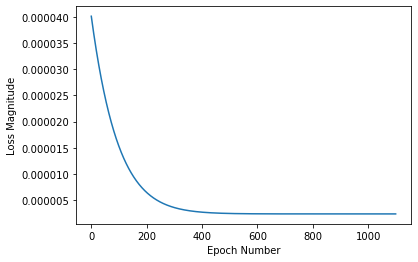

In [30]:
import matplotlib.pyplot as plt
plt.xlabel('Epoch Number')
plt.ylabel("Loss Magnitude")
plt.plot(history.history['loss'])

In [31]:
print(model.predict([5.5]))

print("These are the model variables: {}".format(model.get_weights()))

[[0.9311448]]
These are the model variables: [array([[0.10058284]], dtype=float32), array([0.37793916], dtype=float32)]
